In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Lets check at which time of the day a person users are most active
* we will divide the 24 hours into 6 categories: '12am-3am', '4am-7am', '8am-11am', '12pm-3pm', '4pm-7pm', '8pm-11pm'

In [3]:
df=pd.read_csv("/home/sunit.kapuria/data analyst course/case_study_2/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")

In [4]:
df['ActivityHour']=pd.to_datetime(df['ActivityHour'])

In [24]:
df['Id'].nunique()

33

* Data is available for 33 users

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            22099 non-null  int64         
 1   ActivityHour  22099 non-null  datetime64[ns]
 2   Calories      22099 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 518.1 KB


In [6]:
df.head(5)

,Id,ActivityHour,Calories
0,1503960366,2016-04-12 00:00:00,81
1,1503960366,2016-04-12 01:00:00,61
2,1503960366,2016-04-12 02:00:00,59
3,1503960366,2016-04-12 03:00:00,47
4,1503960366,2016-04-12 04:00:00,48


In [7]:
df['date']=df['ActivityHour'].dt.date

In [8]:
df.head(2)

,Id,ActivityHour,Calories,date
0,1503960366,2016-04-12 00:00:00,81,2016-04-12
1,1503960366,2016-04-12 01:00:00,61,2016-04-12


In [9]:
df['hour']=df['ActivityHour'].dt.hour

In [10]:
df.head(2)

,Id,ActivityHour,Calories,date,hour
0,1503960366,2016-04-12 00:00:00,81,2016-04-12,0
1,1503960366,2016-04-12 01:00:00,61,2016-04-12,1


In [11]:
def hourly(x):
    if x in [0,1,2,3]:
        return 1
    elif x in [4, 5,6,7]:
        return 2
    elif x in [8,9,10,11]:
        return 3
    elif x in [12,13,14,15]:
        return 4
    elif x in [16,17,18,19]:
        return 5
    else:
        return 6
    

In [12]:
df['hour_cat']=df['hour'].apply(hourly)

In [25]:
df.head()

,Id,ActivityHour,Calories,date,hour,hour_cat
0,1503960366,2016-04-12 00:00:00,81,2016-04-12,0,1
1,1503960366,2016-04-12 01:00:00,61,2016-04-12,1,1
2,1503960366,2016-04-12 02:00:00,59,2016-04-12,2,1
3,1503960366,2016-04-12 03:00:00,47,2016-04-12,3,1
4,1503960366,2016-04-12 04:00:00,48,2016-04-12,4,2


In [29]:
new=df.drop(['ActivityHour', 'date'], axis=1)

In [30]:
new.head()

,Id,Calories,hour,hour_cat
0,1503960366,81,0,1
1,1503960366,61,1,1
2,1503960366,59,2,1
3,1503960366,47,3,1
4,1503960366,48,4,2


In [31]:
new.to_csv('/home/sunit.kapuria/data analyst course/case_study_2/new_hourly_category.csv')

In [14]:
xx=df.groupby('hour_cat').mean()[['Calories']]

In [26]:
xx.head()

,Calories
hour_cat,
1,69.674257
2,82.856951
3,107.432760
4,113.731721
5,120.262345


[Text(1, 0, '12am-3am'),
 Text(2, 0, '4am-7am'),
 Text(3, 0, '8am-11am'),
 Text(4, 0, '12pm-3pm'),
 Text(5, 0, '4pm-7pm'),
 Text(6, 0, '8pm-11pm')]

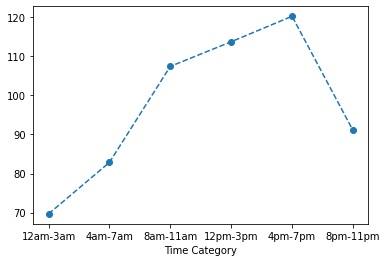

In [16]:
fig, ax = plt.subplots()
plt.plot(xx, 'o--')
plt.xlabel('Time Category')
ax.set_xticks((1,2,3,4,5,6))
ax.set_xticklabels(('12am-3am', '4am-7am', '8am-11am', '12pm-3pm', '4pm-7pm', '8pm-11pm'))

This shows that maximum activity is recorded between 8 am to 7pm, with maximum between 4 Pm to 7pm

### Users are most active between 8 am to 7pm. with maximum activity betwen 4 pm to 7pm.
#### Least activity is in the sleeping hours of 12 am-3am, with gradual increase in the activity

### Lets now check the activity by each hour

In [18]:
yy=df.groupby('hour').mean()['Calories']

In [28]:
xx.head()

,Calories
hour_cat,
1,69.674257
2,82.856951
3,107.432760
4,113.731721
5,120.262345


Text(0.5, 1.0, 'Average calorie burn per hour')

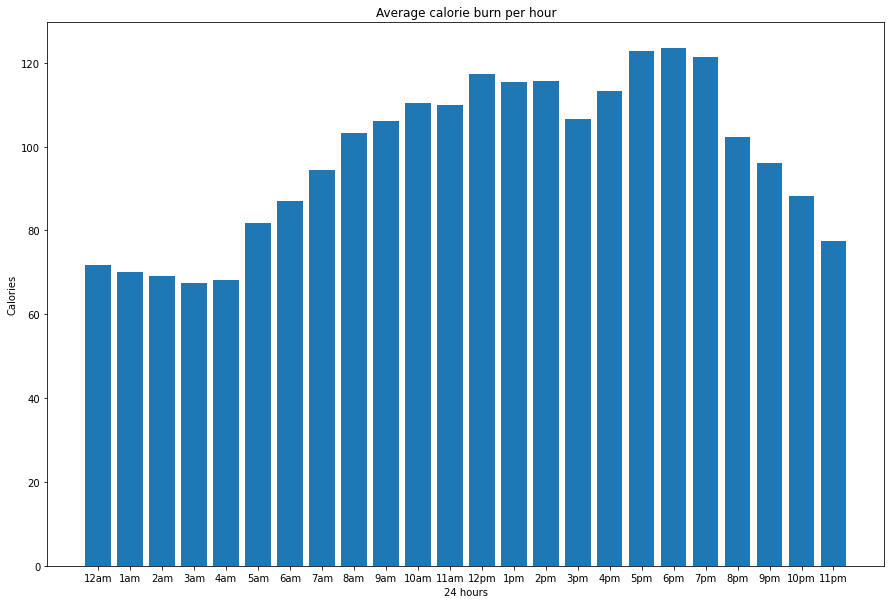

In [23]:
fig, ax = plt.subplots(figsize=(15,10))
plt.bar(list(range(len(yy))),yy)
plt.xlabel('24 hours')
plt.ylabel('Calories')
ax.set_xticks(yy.index)
ax.set_xticklabels(('12am', '1am', '2am', '3am', '4am', '5am', '6am', '7am', '8am', '9am', '10am','11am','12pm','1pm', '2pm', '3pm', '4pm', '5pm', '6pm', '7pm', '8pm', '9pm', '10pm','11pm'))
plt.title('Average calorie burn per hour')

In [59]:
yy[yy>100]

hour
8     103.337272
9     106.142857
10    110.460710
11    109.806904
12    117.197397
13    115.309446
14    115.732899
15    106.637158
16    113.327453
17    122.752759
18    123.492274
19    121.484547
20    102.357616
Name: Calories, dtype: float64

## This shows that the most active hours of users are between 8 am to 8pm where the average calories burn as above 100 per hour